In [1]:
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
response = requests.get(url)

In [3]:
csv_file = "data.csv"

In [4]:
if response.status_code == 200:
    with open(csv_file, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file.")


File downloaded successfully.


In [5]:
df = pd.read_csv(csv_file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
for col in df.columns:
    print("Column name:", col, end="\n")
    print("First five unique values:", df[col].unique()[:5], end="\n")
    print("Count of unique values:", df[col].nunique(), end="\n")
    print("Count of NULL values:", df[col].isnull().sum(), "\n")

Column name: Make
First five unique values: ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
Count of unique values: 48
Count of NULL values: 0 

Column name: Model
First five unique values: ['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
Count of unique values: 915
Count of NULL values: 0 

Column name: Year
First five unique values: [2011 2012 2013 1992 1993]
Count of unique values: 28
Count of NULL values: 0 

Column name: Engine Fuel Type
First five unique values: ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
Count of unique values: 10
Count of NULL values: 3 

Column name: Engine HP
First five unique values: [335. 300. 230. 320. 172.]
Count of unique values: 356
Count of NULL values: 69 

Column name: Engine Cylinders
First five unique values: [ 6.  4.  5.  8. 12.]
Count of unique values: 9
Count of NULL values: 30 

Column name: Transmission Type
First five unique values: ['MANUAL' 'AUTOMATIC' 'AU

In [8]:
cols = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
]

In [9]:
data = df[cols]
data

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [10]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [11]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [12]:
data = data.fillna(0)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [13]:
# Rename the 'MSRP' column to 'price'
data.rename(columns={'msrp': 'price'}, inplace=True)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [14]:
# Calculate the frequency of each transmission type
transmission_counts = data['transmission_type'].value_counts()
transmission_counts

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

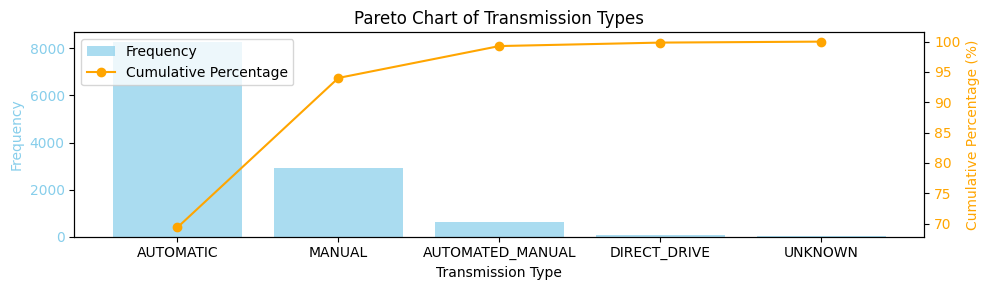

In [15]:
# Sort the transmission types by frequency in descending order
transmission_counts = transmission_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = (transmission_counts / transmission_counts.sum()).cumsum()

# Create a figure and the first Y-axis for frequencies
fig, ax1 = plt.subplots(figsize=(10, 3))
ax1.bar(transmission_counts.index, transmission_counts.values, color='skyblue', alpha=0.7, label='Frequency')
ax1.set_xlabel('Transmission Type')
ax1.set_ylabel('Frequency', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary Y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(transmission_counts.index, cumulative_percentage * 100, color='orange', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding labels and title
plt.title('Pareto Chart of Transmission Types')

# Show legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show the chart
plt.tight_layout()
plt.show()


In [16]:
# Filter and select only the numeric columns (exclude non-numeric)
numeric_columns = data.select_dtypes(exclude=['object'])
# numeric_columns

In [17]:
# Specify the column to exclude
column_to_exclude = 'price'

# Use .drop() to exclude the specified column
df_to_corr = numeric_columns.drop(columns=column_to_exclude)


Numeric Columns Data Types:
year                  int64
engine_hp           float64
engine_cylinders    float64
highway_mpg           int64
city_mpg              int64
price                 int64
dtype: object
                      year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.338714         -0.040708     0.258240  0.198171
engine_hp         0.338714   1.000000          0.774851    -0.415707 -0.424918
engine_cylinders -0.040708   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       0.258240  -0.415707         -0.614541     1.000000  0.886829
city_mpg          0.198171  -0.424918         -0.587306     0.886829  1.000000


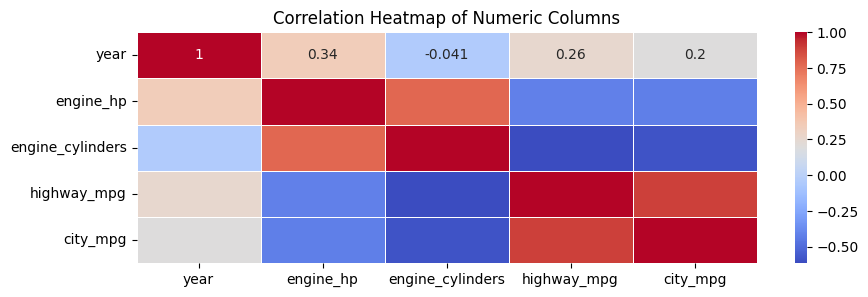

In [18]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df_to_corr.corr()

# Display the data types of numeric columns and the correlation matrix
print("\nNumeric Columns Data Types:")
print(numeric_columns.dtypes)

print(correlation_matrix)
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [19]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [20]:
average_price = data['price'].mean()
average_price

40594.737032063116

In [21]:
# Create the "above_average" column based on the condition
data['above_average'] = data['price'].apply(lambda x: 1 if x > average_price else 0)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [22]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

In [23]:
# Splitting the data into train and remaining (val + test)
train_data, remaining_data = train_test_split(data.drop(columns=['above_average']), test_size=(val_ratio + test_ratio), random_state=42)

# Splitting the remaining data into val and test sets
val_data, test_data = train_test_split(remaining_data, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

In [24]:
# Create the "above_average" column based on the condition
train_data['above_average'] = train_data['price'].apply(lambda x: 1 if x > average_price else 0)
train_data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
4949,Nissan,Frontier,2015,261.0,6.0,AUTOMATIC,Crew Cab Pickup,21,15,32560,0
579,FIAT,500L,2016,160.0,4.0,MANUAL,Wagon,33,25,19495,0
8364,Ford,Ranger,2011,207.0,6.0,MANUAL,Extended Cab Pickup,21,16,22425,0
8775,Chevrolet,S-10,2003,120.0,4.0,MANUAL,Extended Cab Pickup,25,19,18905,0
7370,Mitsubishi,Outlander Sport,2016,168.0,4.0,AUTOMATIC,4dr SUV,27,22,27395,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,Toyota,Venza,2014,181.0,4.0,AUTOMATIC,Wagon,26,20,27950,0
5191,Pontiac,G6,2009,219.0,6.0,AUTOMATIC,Sedan,26,17,24710,0
5390,Volkswagen,Golf GTI,2016,220.0,4.0,AUTOMATED_MANUAL,2dr Hatchback,33,25,27590,0
860,Saab,9-5,2009,260.0,4.0,AUTOMATIC,Wagon,27,17,43270,1


In [25]:
# Splitting the data into train and remaining (val + test)
train_data, remaining_data = train_test_split(data.drop(columns=['price']), test_size=(val_ratio + test_ratio), random_state=42)

# Splitting the remaining data into val and test sets
val_data, test_data = train_test_split(remaining_data, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

In [26]:
# Extract the target variable
target = train_data['above_average']

# Drop the target variable from the training data
train_data = train_data.drop(columns=['above_average'])

# Calculate mutual information scores for each column
mutual_info_scores = {}
for column in train_data.columns:
    score = mutual_info_score(target, train_data[column])
    mutual_info_scores[column] = round(score, 2)

# Sort the scores in descending order
sorted_scores = dict(sorted(mutual_info_scores.items(), key=lambda item: item[1], reverse=True))

# Display the sorted mutual information scores
for column, score in sorted_scores.items():
    print(f"{column}: {score}")


model: 0.46
engine_hp: 0.36
make: 0.24
engine_cylinders: 0.12
vehicle_style: 0.08
year: 0.07
city_mpg: 0.06
highway_mpg: 0.05
transmission_type: 0.02


In [27]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [28]:
# Create the "above_average" column based on the condition
data['above_average'] = data['price'].apply(lambda x: 1 if x > average_price else 0)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [29]:
# Splitting the data into train and remaining (val + test)
train_data, remaining_data = train_test_split(data.drop(columns=['price']), test_size=(val_ratio + test_ratio), random_state=42)

# Splitting the remaining data into val and test sets
val_data, test_data = train_test_split(remaining_data, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

In [30]:
# Extract the target variable and features
y_train = train_data['above_average']
y_val = val_data['above_average']

# Identify categorical columns of "object" data type
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Create and fit the encoder on the training data with handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(train_data[categorical_columns])

# Apply encoding to both training and validation data
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=train_data.index)
X_val_encoded = encoder.transform(val_data[categorical_columns])

# Create and fit the logistic regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict on the validation dataset
y_val_pred = model.predict(X_val_encoded)

# Calculate the accuracy on the validation dataset
accuracy = accuracy_score(y_val, y_val_pred)

# Round the accuracy to 2 decimal digits
rounded_accuracy = round(accuracy, 2)

print(f"Validation Accuracy: {rounded_accuracy}")


Validation Accuracy: 0.93


c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
# Splitting the data into train and remaining (val + test)
train_data, remaining_data = train_test_split(data.drop(columns=['price']), test_size=(val_ratio + test_ratio), random_state=42)

# Splitting the remaining data into val and test sets
val_data, test_data = train_test_split(remaining_data, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

In [32]:
# Extract the target variable and selected features
y_train = train_data['above_average']
y_val = val_data['above_average']
X_train = train_data[['year', 'engine_hp', 'city_mpg']]

# Perform one-hot encoding for the 'transmission_type' column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(train_data[['transmission_type']])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['transmission_type']), index=train_data.index)

# Concatenate the encoded features with the selected features
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

# Initialize a logistic regression model with all selected features
model = LogisticRegression(solver='newton-cg', C=10, max_iter=1000, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prepare the validation data with one-hot encoding
X_val_encoded = encoder.transform(val_data[['transmission_type']])
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(['transmission_type']), index=val_data.index)
X_val = pd.concat([val_data[['year', 'engine_hp', 'city_mpg']], X_val_encoded_df], axis=1)

# Calculate the accuracy on the validation dataset with all selected features
y_val_pred_all = model.predict(X_val)
accuracy_all = accuracy_score(y_val, y_val_pred_all)

# Initialize a dictionary to store feature importance differences
feature_importance_diff = {}

# Iterate through each feature and calculate accuracy difference when removing the feature
for feature in X_train.columns:
    # Create a copy of the training and validation data without the feature
    X_train_without_feature = X_train.drop(columns=[feature])
    X_val_without_feature = X_val.drop(columns=[feature])

    # Create and fit a logistic regression model without the feature, using all processors
    model_without_feature = LogisticRegression(solver='newton-cg', C=10, max_iter=1000, random_state=42, n_jobs=-1)
    model_without_feature.fit(X_train_without_feature, y_train)

    # Predict on the validation dataset without the feature
    y_val_pred_without_feature = model_without_feature.predict(X_val_without_feature)

    # Calculate the accuracy without the feature
    accuracy_without_feature = accuracy_score(y_val, y_val_pred_without_feature)

    # Calculate the accuracy difference
    accuracy_diff = accuracy_all - accuracy_without_feature

    # Store the accuracy difference for the current feature
    feature_importance_diff[feature] = accuracy_diff

# Sort features by their accuracy differences (largest impact first)
sorted_feature_importance_diff = dict(sorted(feature_importance_diff.items(), key=lambda item: item[1], reverse=True))

# Display the feature importance differences
for feature, diff in sorted_feature_importance_diff.items():
    print(f"Feature: {feature}, Accuracy Difference: {diff:.10f}")

# Remove features starting from the largest impact
for feature, _ in sorted_feature_importance_diff.items():
    X_train = X_train.drop(columns=[feature])
    X_val = X_val.drop(columns=[feature])


c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature: engine_hp, Accuracy Difference: 0.0885438523
Feature: city_mpg, Accuracy Difference: 0.0029374738
Feature: year, Accuracy Difference: 0.0016785564
Feature: transmission_type_DIRECT_DRIVE, Accuracy Difference: 0.0008392782
Feature: transmission_type_MANUAL, Accuracy Difference: 0.0008392782
Feature: transmission_type_UNKNOWN, Accuracy Difference: 0.0008392782
Feature: transmission_type_AUTOMATED_MANUAL, Accuracy Difference: 0.0000000000
Feature: transmission_type_AUTOMATIC, Accuracy Difference: 0.0000000000


In [33]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [34]:
# Splitting the data into train and remaining (val + test)
train_data, remaining_data = train_test_split(data.drop(columns=['above_average']), test_size=(val_ratio + test_ratio), random_state=42)

# Splitting the remaining data into val and test sets
val_data, test_data = train_test_split(remaining_data, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

In [35]:
# Extract the target variable 'price'
y_train = train_data['price']
y_val = val_data['price']

# Logarithmic transformation of the target variable
y_train_log = np.log1p(y_train)  # Log transformation
y_val_log = np.log1p(y_val)

# Initialize a list to store RMSE scores for different alpha values
rmse_scores = []

# Ridge regression with different alpha values
alpha_values = [0, 0.01, 0.1, 1, 10]

for alpha in alpha_values:
    # Initialize and fit the Ridge regression model
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(train_data[['year', 'engine_hp', 'engine_cylinders', 'city_mpg', 'highway_mpg']], y_train_log)

    # Predict on the validation data
    y_val_pred_log = model.predict(val_data[['year', 'engine_hp', 'engine_cylinders', 'city_mpg', 'highway_mpg']])

    # Calculate RMSE and round it to 3 decimal digits
    rmse = np.sqrt(mean_squared_error(y_val_log, y_val_pred_log))
    rmse_rounded = round(rmse, 10)

    # Append the RMSE score to the list
    rmse_scores.append(rmse_rounded)

# Display RMSE scores for different alpha values
for alpha, rmse_score in zip(alpha_values, rmse_scores):
    print(f"Alpha={alpha}: RMSE={rmse_score}")


Alpha=0: RMSE=0.518639851
Alpha=0.01: RMSE=0.5186398528
Alpha=0.1: RMSE=0.5186398688
Alpha=1: RMSE=0.5186400298
Alpha=10: RMSE=0.518641797
